In [60]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
from pylab import imread
from skimage.color import rgb2gray
import math

In [61]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert ImageData and LabelData to List
  from matplotlib import pyplot as plt
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))
        
  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      # If the channel number is less than 3, we display as grayscale image
      # otherwise, we display as color image
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()

def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

fix from here

In [62]:
# Đọc ảnh
image = cv2.imread("special.jpg", cv2.IMREAD_UNCHANGED)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Lấy kích thước ảnh
(h, w) = image_gray.shape
print(h, w)

1080 810


In [63]:
# Tạo nền theo kích thước được cho
height, width = h, w
image_bg = Image.new('RGB', (width, height), color='white')
image_bg.save("sample1.png")

In [64]:
from PIL import Image, ImageDraw, ImageFont

background_image = Image.open("sample1.png")
width, height = background_image.size

text_image = Image.new("RGBA", (width, height), (0, 0, 0, 0)) 
draw = ImageDraw.Draw(text_image)

font = ImageFont.truetype("arial.ttf", 40)
text = "test font"
text_width = draw.textlength(text, font=font)
text_height = font.size  

x = (width - text_width) / 2 - text_width * 0.05 
y = (height - text_height) / 2                  
# Draw text before rotation
draw.text((x, y), text, font=font, fill=(0, 0, 0, 255))  

rotated_text_image = text_image.rotate(45, expand=True, fillcolor="white") 

rot_width, rot_height = rotated_text_image.size
center_x = (width - rot_width) // 2
center_y = (height - rot_height) // 2

background_image.paste(rotated_text_image, (center_x, center_y), mask=rotated_text_image)


background_image.save("new_img.jpg")

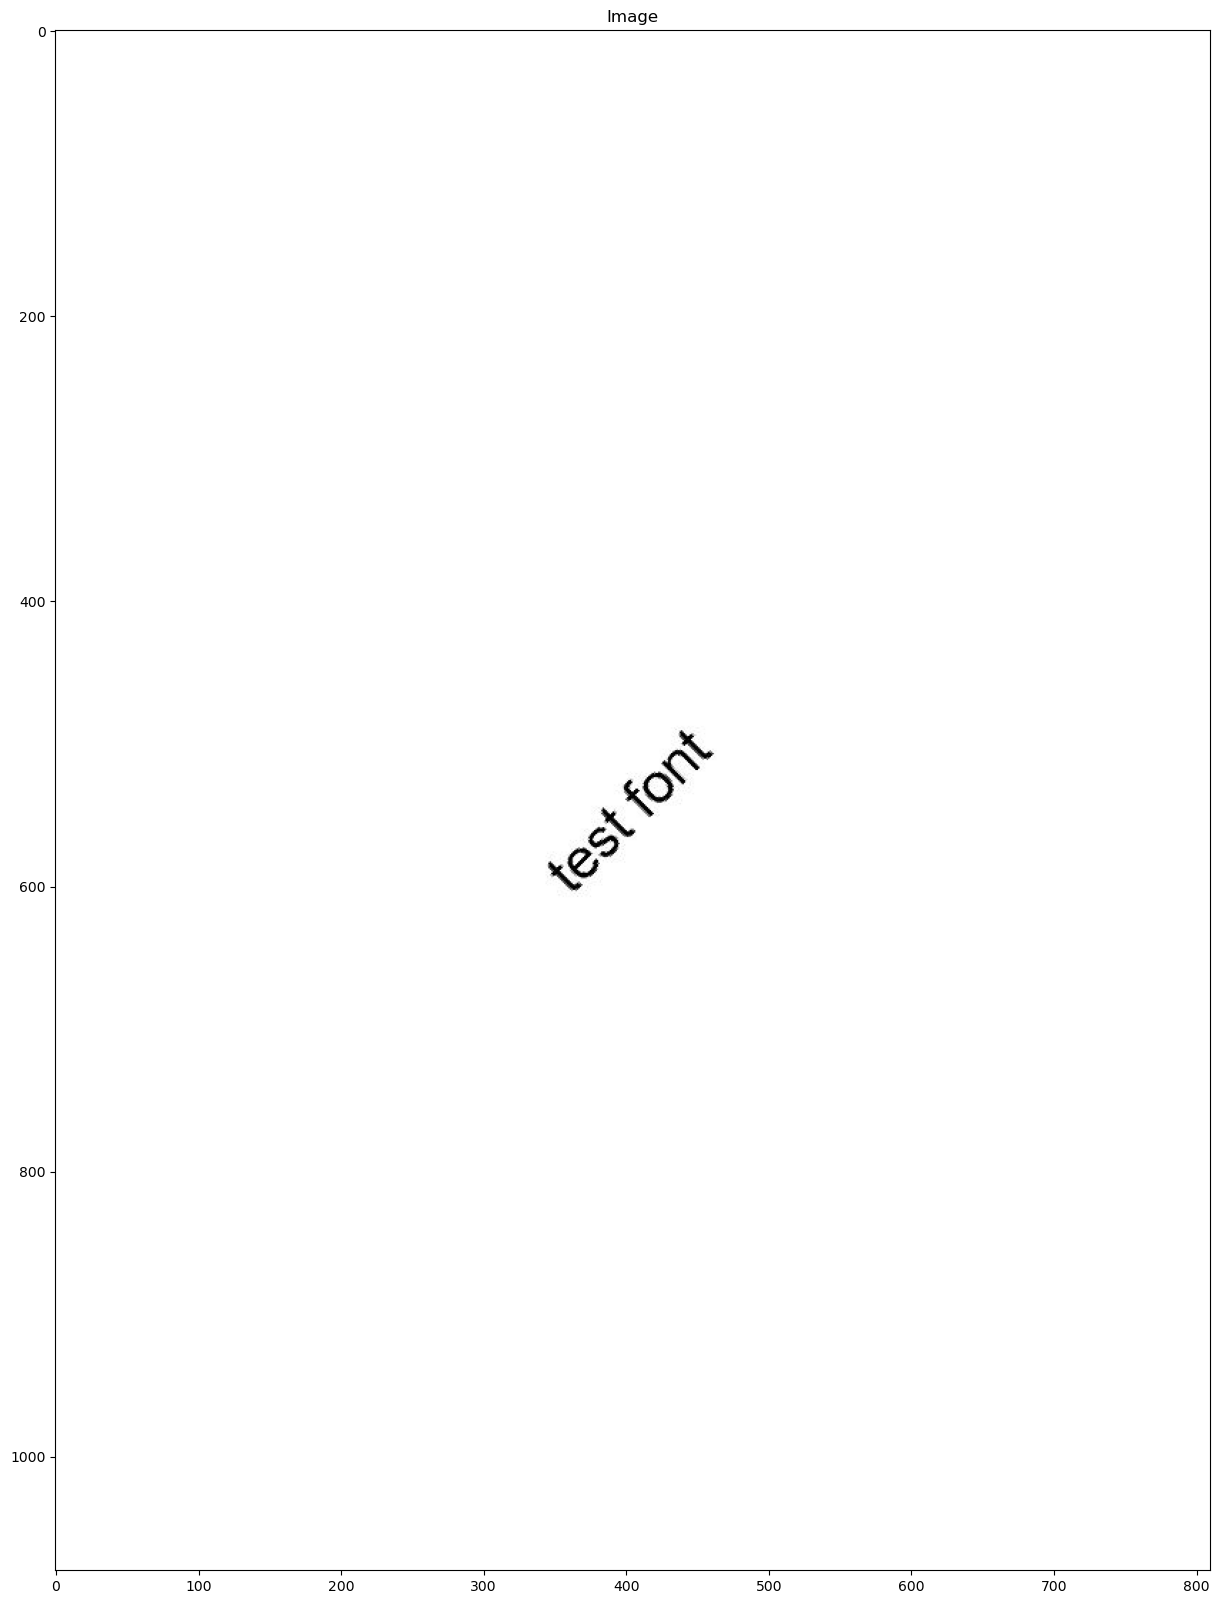

In [65]:
# Đọc ảnh và chuyển sang ảnh xám
image = cv2.imread('new_img.jpg', cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_color = cv2.imread('new_img.jpg')
ShowOneImage(image_color)

In [76]:
all_contours = np.vstack(contours)

# Bounding box hình chữ nhật nghiêng cho toàn bộ các contours
rect = cv2.minAreaRect(all_contours)
box = cv2.boxPoints(rect)
box = np.int32(box)  # Ép kiểu về số nguyên

# Vẽ khung hình chữ nhật nghiêng lên ảnh
cv2.drawContours(image_color, [box], 0, (0, 255, 0), 2)  # Màu xanh lá cây

image_bg = cv2.imread("special.jpg", cv2.IMREAD_UNCHANGED)
cv2.drawContours(image_bg, [box], 0, (0, 255, 0), 2)  # Màu xanh lá cây

# Lưu và hiển thị ảnh kết quả
cv2.imwrite('sample1_bb.png', image_color)
cv2.imwrite('test1.png', image_bg)

True

In [79]:
from PIL import Image, ImageDraw, ImageFont

# Tải hình nền
background_image = Image.open("test1.png")  # Thay đổi thành đường dẫn đến hình nền của bạn

# Tạo đối tượng ImageDraw
draw = ImageDraw.Draw(background_image)

# Tính toán bounding box của văn bản
bbox = draw.textbbox((0, 0), text, font=font)

# Vẽ văn bản vào hình nền
draw.text(box[0], text, font=font, fill=(0, 0, 0))

# Hiển thị hình ảnh
background_image.show()
background_image.save("result2.png")  # Lưu kết quả

chỉ sửa cell trên

In [67]:
print(box[0])
print(box[1])
print(box[2])
print(box[3])
x0, y0 = box [0]
x2, y2 = box [2]
width = box[2] - box[0]
height = box[3] - box[1]
print(x0, y0, x2, y2)
print(width, height)

[342 585]
[441 487]
[461 507]
[362 605]
342 585 461 507
[119 -78] [-79 118]


In [68]:
x0, y0 = box [0]
x1, y1 = box [1]

print(x1-x0)

99


In [69]:
x2, y2 = box [2]
x3, y3 = box [3]

print(x3-x2)

-99


In [70]:
for x in range(4):
  print(box[x])

[342 585]
[441 487]
[461 507]
[362 605]


In [71]:
def find_min_max(box):
    # Khởi tạo các giá trị lớn nhất và nhỏ nhất ban đầu từ phần tử đầu tiên
    x_min, y_min = box[0]
    x_max, y_max = box[0]
    
    # Duyệt qua các phần tử còn lại trong danh sách
    for x, y in box:
        # Cập nhật x_min và x_max
        if x < x_min:
            x_min = x
        if x > x_max:
            x_max = x
        
        # Cập nhật y_min và y_max
        if y < y_min:
            y_min = y
        if y > y_max:
            y_max = y
    
    return x_min, x_max, y_min, y_max

# Ví dụ box[a] trong range(4) với các giá trị trả về là các cặp (x, y)

# Gọi hàm để tìm các giá trị min và max
x_min, x_max, y_min, y_max = find_min_max(box)

# In kết quả
print(f"x_min: {x_min}, x_max: {x_max}, y_min: {y_min}, y_max: {y_max}")


x_min: 342, x_max: 461, y_min: 487, y_max: 605


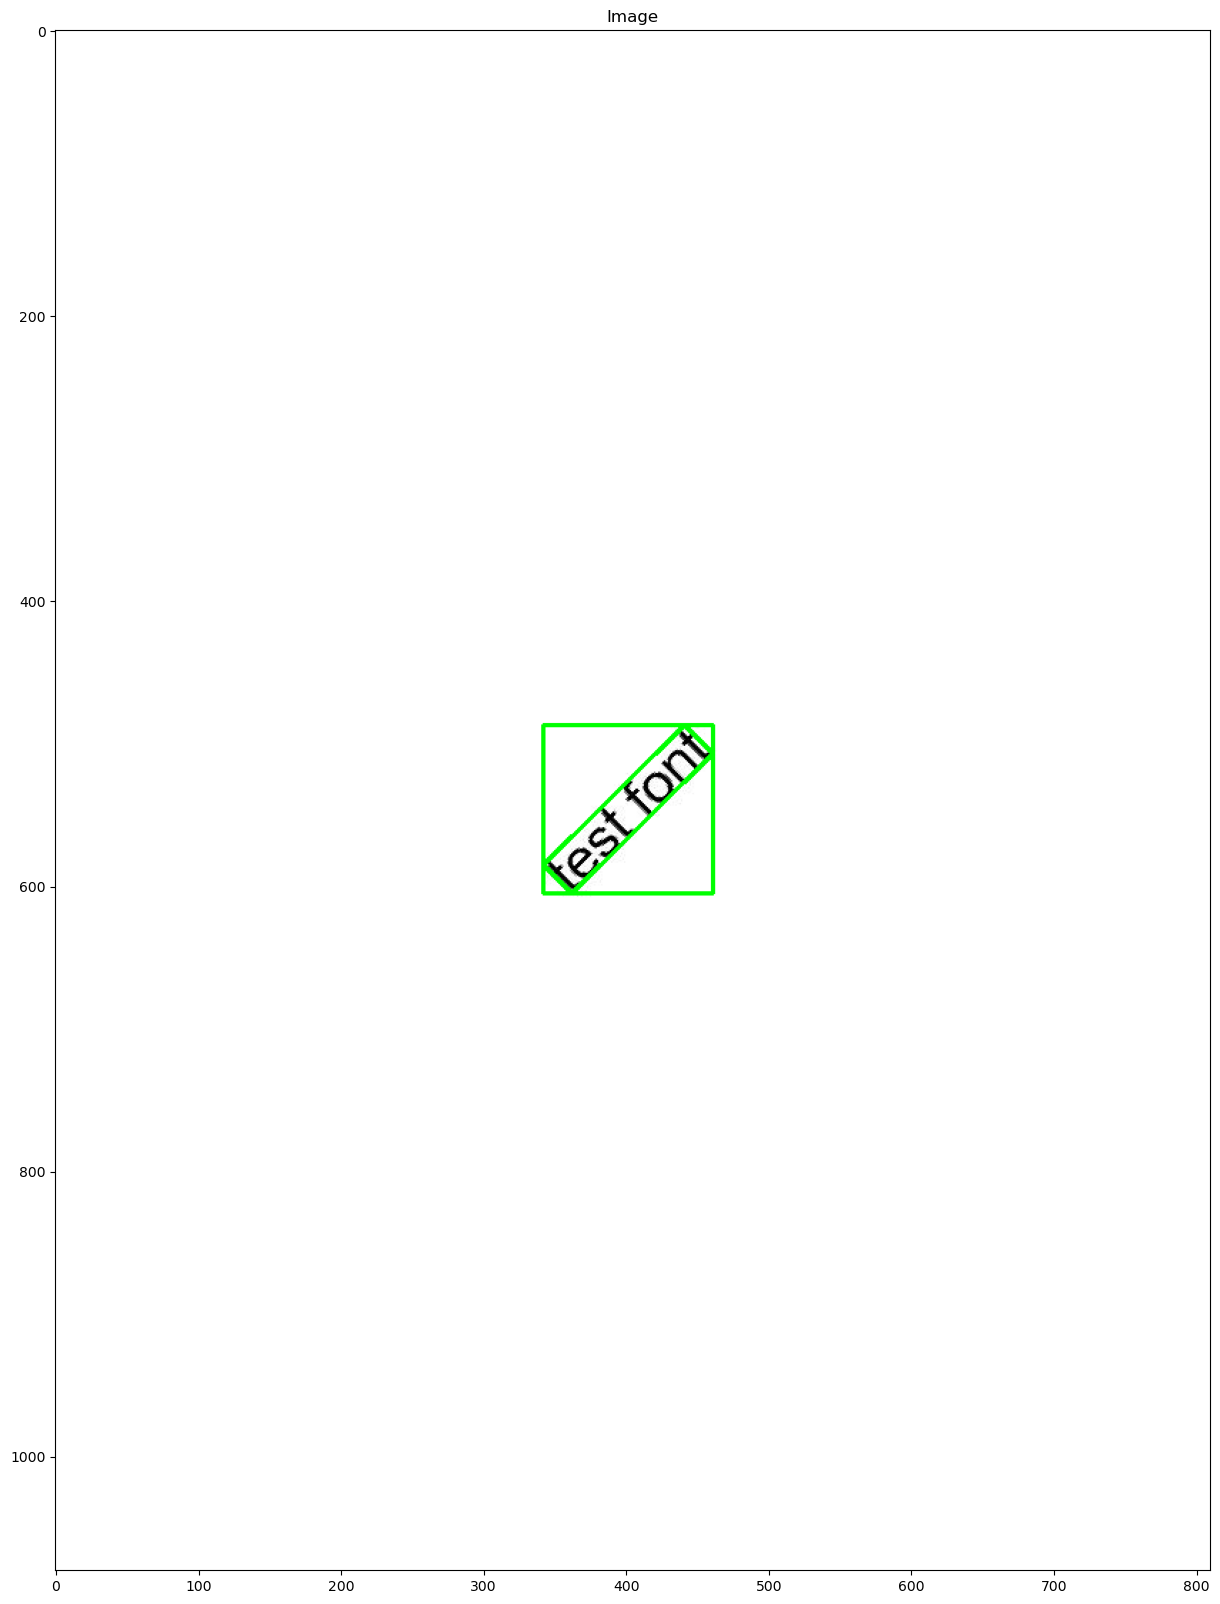

In [72]:
top_left = (x_min, y_min)
bottom_right = (x_max, y_max)
cv2.rectangle(image_color, top_left, bottom_right, (0, 255, 0), 2)
ShowOneImage(image_color)

3 520.0 [119 -78] [-79 118]


True

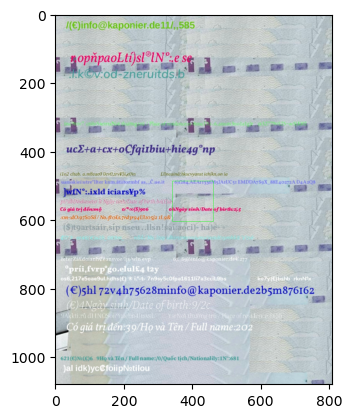

In [73]:
# Đọc ảnh
image_bg = cv2.imread("special.jpg", cv2.IMREAD_UNCHANGED)

box_color = (0, 255, 0)  
thickness = 1  

# Vẽ hình chữ nhật (bounding box) lên hình nền
cv2.rectangle(image_bg, top_left, bottom_right, box_color, thickness)

print(x,y, width, height)

# Hiển thị hình ảnh kết quả
plt.imshow(image_bg)
cv2.imwrite('bb_result_2.jpg',image_bg)

In [75]:
width = box[2] - box[0]
height = box[3] - box[1]
print(width, height)

[119 -78] [-79 118]
